In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('exams.csv')
data.columns = [c.replace(' ', '_') for c in data.columns]
originalFeatures = data.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures', originalFeatures)
print(data.head())

originalFeatures count 8
originalFeatures Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')
   gender race/ethnicity parental_level_of_education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  


In [2]:
pd.DataFrame({'parental level of education':data.parental_level_of_education})

,parental level of education
0,high school
1,some high school
2,some college
3,high school
4,associate's degree
...,...
995,high school
996,associate's degree
997,some high school
998,some college


Text(0.5, 1.0, 'writing_score and reading_score')

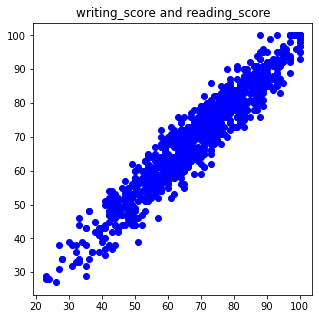

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(data.writing_score, data.reading_score, color='blue')
plt.title('writing_score and reading_score')

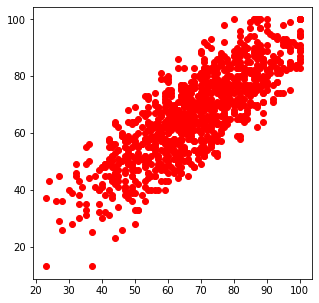

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(data.writing_score, data.math_score,color='red')

In [5]:
drops = ['writing_score']
for drop in drops:
    data = data.drop(drops,1)

In [6]:
data.columns = [c.replace(' ', '_') for c in data.columns]
originalFeatures = data.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures', originalFeatures)
print(data.head())

originalFeatures count 7
originalFeatures Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score'],
      dtype='object')
   gender race/ethnicity parental_level_of_education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test_preparation_course  math_score  reading_score  
0               completed          67             67  
1                    none          40             59  
2                    none          59             60  
3                    none          77             78  
4               completed          78             73  


In [7]:
dataParent = data['parental_level_of_education'].replace('some high school', 'high school')

In [8]:
df = data.loc[data['parental_level_of_education']=='some high school','parental_level_of_education']='high school'

In [9]:
df = pd.DataFrame(data)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,male,group A,high school,standard,completed,67,67
1,female,group D,high school,free/reduced,none,40,59
2,male,group E,some college,free/reduced,none,59,60
3,male,group B,high school,standard,none,77,78
4,male,group E,associate's degree,standard,completed,78,73


In [12]:
data.tail()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
995,male,group C,high school,standard,none,73,70
996,male,group D,associate's degree,free/reduced,completed,85,91
997,female,group C,high school,free/reduced,none,32,35
998,female,group C,some college,standard,none,73,74
999,male,group A,some college,standard,completed,65,60


In [13]:
df.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
dtype: object

In [14]:
df['parental_level_of_education'].unique()

array(['high school', 'some college', "associate's degree",
       "bachelor's degree", "master's degree"], dtype=object)

In [15]:
df['race/ethnicity'].unique()


array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [16]:
df['gender'].unique()


array(['male', 'female'], dtype=object)

In [17]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
df['test_preparation_course'].unique()

array(['completed', 'none'], dtype=object)

In [19]:
ohe = OneHotEncoder()

In [20]:
ohe.fit_transform(df[["gender","race/ethnicity","parental_level_of_education","lunch","test_preparation_course"]]).toarray()

array([[0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [21]:
feature_arry = ohe.fit_transform(df[["gender","race/ethnicity","parental_level_of_education","lunch","test_preparation_course"]]).toarray()

In [22]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college'], dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

In [23]:
feature_labels = ohe.categories_

In [24]:
np.hstack(feature_labels)

array(['female', 'male', 'group A', 'group B', 'group C', 'group D',
       'group E', "associate's degree", "bachelor's degree",
       'high school', "master's degree", 'some college', 'free/reduced',
       'standard', 'completed', 'none'], dtype=object)

In [25]:
feature_labels = np.hstack(feature_labels)

In [26]:
print(feature_labels)

['female' 'male' 'group A' 'group B' 'group C' 'group D' 'group E'
 "associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'free/reduced' 'standard' 'completed' 'none']


In [27]:
pd.DataFrame(feature_arry, columns = feature_labels)

,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,free/reduced,standard,completed,none
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [28]:
features = pd.DataFrame(feature_arry, columns = feature_labels)

In [29]:
print(features)

     female  male  group A  group B  group C  group D  group E  \
0       0.0   1.0      1.0      0.0      0.0      0.0      0.0   
1       1.0   0.0      0.0      0.0      0.0      1.0      0.0   
2       0.0   1.0      0.0      0.0      0.0      0.0      1.0   
3       0.0   1.0      0.0      1.0      0.0      0.0      0.0   
4       0.0   1.0      0.0      0.0      0.0      0.0      1.0   
..      ...   ...      ...      ...      ...      ...      ...   
995     0.0   1.0      0.0      0.0      1.0      0.0      0.0   
996     0.0   1.0      0.0      0.0      0.0      1.0      0.0   
997     1.0   0.0      0.0      0.0      1.0      0.0      0.0   
998     1.0   0.0      0.0      0.0      1.0      0.0      0.0   
999     0.0   1.0      1.0      0.0      0.0      0.0      0.0   

     associate's degree  bachelor's degree  high school  master's degree  \
0                   0.0                0.0          1.0              0.0   
1                   0.0                0.0          1.0

In [30]:
features.head()

,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,free/reduced,standard,completed,none
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
pd.concat([df, features], axis=1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,female,male,group A,...,group E,associate's degree,bachelor's degree,high school,master's degree,some college,free/reduced,standard,completed,none
0,male,group A,high school,standard,completed,67,67,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,female,group D,high school,free/reduced,none,40,59,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,male,group E,some college,free/reduced,none,59,60,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,male,group B,high school,standard,none,77,78,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,group E,associate's degree,standard,completed,78,73,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
996,male,group D,associate's degree,free/reduced,completed,85,91,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
997,female,group C,high school,free/reduced,none,32,35,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,female,group C,some college,standard,none,73,74,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [32]:
df_new = pd.concat([df, features], axis=1)

In [33]:
df_new.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,female,male,group A,...,group E,associate's degree,bachelor's degree,high school,master's degree,some college,free/reduced,standard,completed,none
0,male,group A,high school,standard,completed,67,67,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,female,group D,high school,free/reduced,none,40,59,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,male,group E,some college,free/reduced,none,59,60,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,male,group B,high school,standard,none,77,78,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,group E,associate's degree,standard,completed,78,73,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
